In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
  
# setting path
import parse_map
%matplotlib inline

DEG_TO_RAD = np.pi/180
RAD_TO_DEG = 180/np.pi

In [92]:
def calculate_line(length, hdg, x,y):      
    return lambda t: (np.array([np.cos(hdg), np.sin(hdg)]) * length * t) + np.array([x,y])

def calculate_arc(curvature, x,y): 
    return lambda t: np.array([x,y]) + 1/curvature * np.array([np.cos(t/(1/curvature)), np.sin(t/(1/curvature))])

def deriv_arc(curvature, x,y): 
    return lambda t: np.array([-np.sin(t*curvature), np.cos(t*curvature)])

def deriv_line(length, hdg): 
    return lambda t: np.array([-np.sin(hdg), np.cos(hdg)])*length

def get_hdg_vec(hdg): 
    return np.array([np.cos(hdg), np.sin(hdg)])

    
# returns the arc with correct heading and length
def get_adjusted_arc(x,y,hdg, length, curvature):
    print(hdg)
    # get the derivation of this arc
    deriv_of_arc = deriv_arc(length, hdg, curvature, x,y)
    # get the derivation of according tangent
    deriv_of_line = deriv_line(length, hdg)
    # get the tempo vector
    tempo_vec = deriv_of_line(0)
    #get the gradient of the line
    line_gradient = tempo_vec[1] / tempo_vec[0]
    #get the stepsize
    step = 0.001
    # get all the T values
    arc_Ts = np.arange(0, 2*np.pi + step, step)
    
    arc_gradients = []
    line_gradients = []
    #iterate over t values
    for t in arc_Ts: 
        arc_tempo_vec = deriv_of_arc(t)
        if (arc_tempo_vec[0] == 0): 
            arc_tempo_vec[0] = 0.00000000001
        # append the gradients for each t value of the curve in a list
        arc_gradients.append(arc_tempo_vec[1] / arc_tempo_vec[0])
        line_gradients.append(line_gradient)
    
    #find the index with the lowest difference between gradients
    gradient_diffs = np.array(arc_gradients)-np.array(line_gradients)
    min_diff_index = np.argmin(gradient_diffs)
    t = arc_Ts[min_diff_index]
    

    # start at the according t value
    arc_Ts = np.arange(t, 10000 + step, step)
    arc = calculate_arc(length, hdg, curvature, x,y)
    adjusted_arc_points = []
    arc_length = 0
    # Do the parametrisation and translate all points so that start of the curve is at x,y
    for t in arc_Ts: 
        adjusted_arc_points.append(arc(t))
        arc_length += np.linalg.norm(deriv_of_arc(t)*step)
        # draw arc as long as it stays in length
        if (arc_length >= length): 
            break
        
    
    # translate points
    adjusted_arc_points = np.array(adjusted_arc_points)
    difference_vec = np.array(adjusted_arc_points[0] - np.array([x,y])) 
    adjusted_arc_points = adjusted_arc_points - difference_vec
    return adjusted_arc_points



def plot_arc(arc_points, tempo_vec_t0, target_vec,tempo_vec_t0_rot):
    %matplotlib inline
    plt.plot(arc_points[:,0], arc_points[:,1])
    plt.scatter(arc_points[0:3,0], arc_points[0:3,1], c="orange")
    
    plt.quiver(arc_points[0][0], arc_points[0][1], tempo_vec_t0[0], tempo_vec_t0[1])
    
    plt.quiver(0,0, target_vec[0], target_vec[1])
    

    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    
    plt.show()


In [102]:
def adjusted_arc(x,y,hdg,length,curvature): 
    #first create the arc and then translate the tempo vector at the base and apply that translation to all points
    step = 0.001
    arc_Ts = np.arange(0, 2*np.pi + step, step)

    arc = calculate_arc(curvature, x,y)
    deriv_of_arc = deriv_arc(curvature, x,y)

    adjusted_arc_points = []
    arc_length = 0
    for t in arc_Ts: 
        adjusted_arc_points.append(arc(t))
        arc_length += np.linalg.norm(deriv_of_arc(t)*step)
        if (arc_length >= length): 
            break

    # find the tempo vector at t0
    tempo_vec_t0 = deriv_of_arc(arc_Ts[0])

    # create the target vector 
    target_vec = np.array([np.cos(hdg), np.sin(hdg)])

    # get angle between vectors 
    unit_tempo_vec_t0 = tempo_vec_t0 / np.linalg.norm(tempo_vec_t0)
    unit_target_vec = target_vec / np.linalg.norm(target_vec)
    dot_product = np.dot(unit_tempo_vec_t0, unit_target_vec)
    theta = np.arccos(dot_product)
    print(str(theta*RAD_TO_DEG) + ' degrees between')


    # define rotation matrix
    rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

    tempo_vec_t0_rot = np.dot(tempo_vec_t0,rot)

    return np.array(adjusted_arc_points), tempo_vec_t0, target_vec, tempo_vec_t0_rot

90.0 degrees between


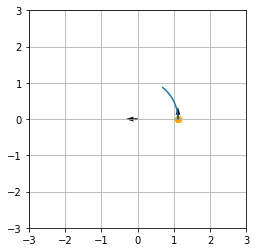

In [101]:
arc, tempo_vec_t0, target_vec, tempo_vec_t0_rot = adjusted_arc(x=0,y=0,hdg=np.pi,length=1,curvature=0.9)
plot_arc(arc, tempo_vec_t0, target_vec,tempo_vec_t0_rot)

In [28]:
arc

array([[5.00000000e+00, 0.00000000e+00],
       [4.99999990e+00, 9.99999993e-04],
       [4.99999960e+00, 1.99999995e-03],
       ...,
       [4.90092802e+00, 9.90406276e-01],
       [4.90072984e+00, 9.91386441e-01],
       [4.90053146e+00, 9.92366568e-01]])

In [11]:
import numpy as np
randoms = np.random.rand(20,2)

In [15]:
zeros = np.zeros((20,2))

In [16]:
np.column_stack(randoms, zeros)

TypeError: _column_stack_dispatcher() takes 1 positional argument but 2 were given

In [4]:
np.concatenate([np.full((5,1), "HI"), np.full((4,1), "DU")])

array([['HI'],
       ['HI'],
       ['HI'],
       ['HI'],
       ['HI'],
       ['DU'],
       ['DU'],
       ['DU'],
       ['DU']], dtype='<U2')

In [10]:
    line_types = np.full((100,), "line")


In [11]:
line_types

array(['line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line', 'line', 'line', 'line', 'line',
       'line', 'line', 'line', 'line'], dtype='<U4')